In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import os
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_combined_stc_z = pd.read_csv(os.path.join(folder_path, "features_combined_stc_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_combined_stc_mm = pd.read_csv(os.path.join(folder_path, "features_combined_stc_minmax.csv"))

#se quitan las columnas 'filename' y 'label'
df_combined_stc_mm_cl= df_combined_stc_mm.drop(columns=['label', 'filename'])
df_combined_stc_z_cl= df_combined_stc_z.drop(columns=[ 'label', 'filename'])

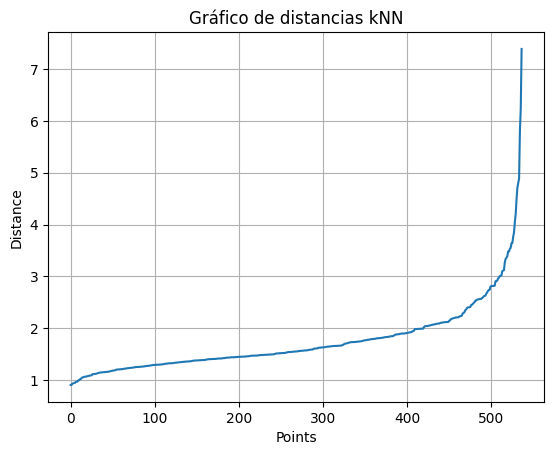

In [3]:
k = 10 #17
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_combined_stc_z_cl)
distances, indices = neighbors_fit.kneighbors(df_combined_stc_z_cl)

distances = np.sort(distances[:, k - 1])  

plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Gráfico de distancias kNN")
plt.grid(True)
plt.show()

In [4]:
X_combined_stc_z = np.array(df_combined_stc_z_cl)
clustering = DBSCAN(eps=1.45, min_samples=13).fit(X_combined_stc_z) 
clustering.labels_

array([ 0, -1,  0,  0, -1,  0,  1, -1,  0,  0, -1,  1, -1,  0,  0, -1,  1,
        0,  0,  0, -1,  0, -1, -1,  0,  0, -1, -1,  0, -1, -1,  0,  0,  0,
        1,  0,  0,  0,  0,  0, -1,  1,  0,  0, -1, -1, -1,  0, -1, -1, -1,
        0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0,  0, -1,  0,  0,
       -1, -1, -1, -1, -1, -1,  0, -1, -1,  1,  1, -1,  0, -1,  0, -1,  0,
        0,  0, -1,  0,  1,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1,
        0, -1, -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1,  0,  0,
        0, -1,  0, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1, -1, -1, -1,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0, -1,  0,  0,  0, -1, -1, -1, -1,  0, -1,
        0,  0,  0, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0,  0, -1, -1, -1,
       -1, -1, -1, -1,  0

In [5]:
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 2
Número de puntos de ruido: 218


In [6]:
y_true = df_combined_stc_z['label'] 
y_pred = clustering.labels_     

contingency_table_z = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table_z)

Cluster DBSCAN   -1    0   1
Etiqueta Real               
higher           77  190   1
smaller         141  119   9


In [7]:
# Elimina puntos de ruido 
mask = y_pred != -1
if len(set(y_pred[mask])) > 1:
    silhouette = silhouette_score(X_combined_stc_z[mask], y_pred[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters para calcular la Silhouette (se necesita al menos 2).")

Silhouette Score (sin ruido): 0.175


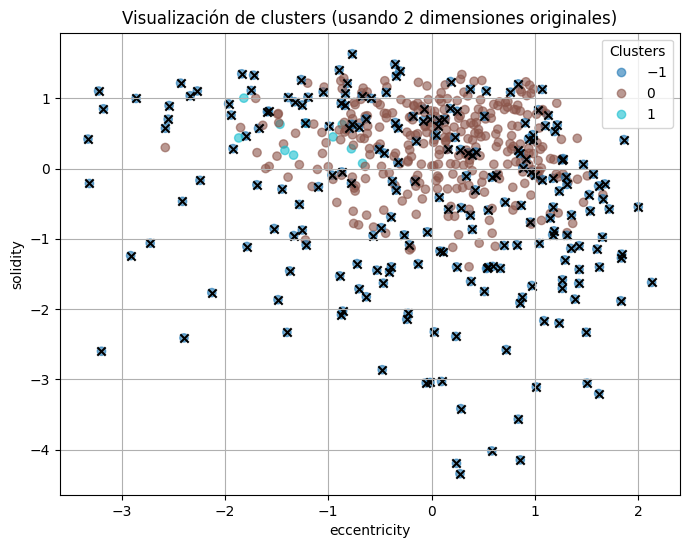

In [8]:
labels = clustering.labels_

# Convertimos a array por si aún está en DataFrame
X = df_combined_stc_z.values

# Graficamos usando las dos primeras características (columnas 0 y 1)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', alpha=0.6)

# Destacar los puntos de ruido (-1)
if -1 in labels:
    plt.scatter(X[labels == -1, 0], X[labels == -1, 1],
                c='black', marker='x', label='Ruido')

plt.title("Visualización de clusters (usando 2 dimensiones originales)")
plt.xlabel(df_combined_stc_z_cl.columns[0])
plt.ylabel(df_combined_stc_z_cl.columns[1])
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


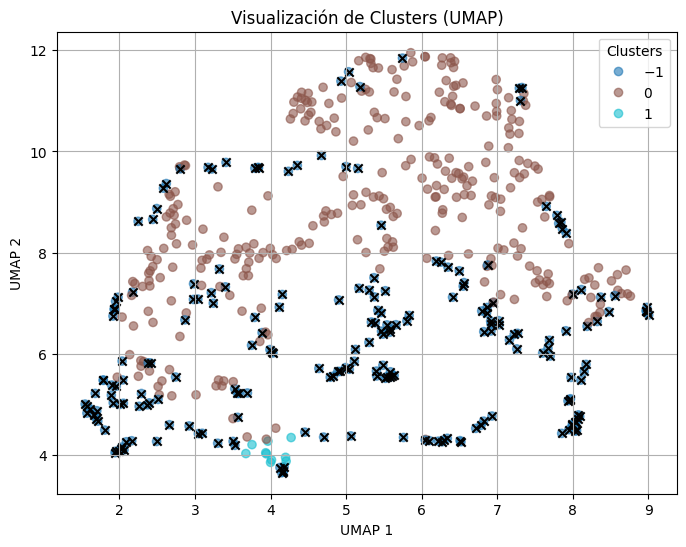

In [9]:
reducer = umap.UMAP(n_neighbors=10, n_components=2, random_state=42)
X_umap = reducer.fit_transform(df_combined_stc_z_cl)

labels = clustering.labels_  


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='tab10', alpha=0.6)

# Si hay ruido (etiqueta -1), lo destacamos
if -1 in labels:
    plt.scatter(X_umap[labels == -1, 0], X_umap[labels == -1, 1],
                c='black', marker='x', label='Ruido')

plt.title("Visualización de Clusters (UMAP)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()

min-max

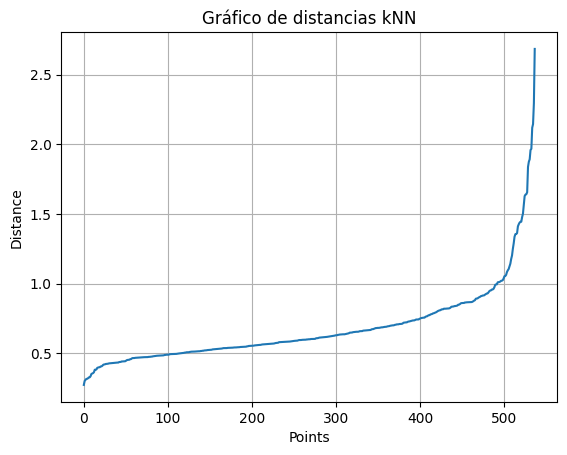

In [10]:
k = 10 #17
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_combined_stc_mm_cl)
distances, indices = neighbors_fit.kneighbors(df_combined_stc_mm_cl)

distances = np.sort(distances[:, k - 1])  

plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Gráfico de distancias kNN")
plt.grid(True)
plt.show()

In [11]:
X_combined_stc_mm = np.array(df_combined_stc_mm_cl)

clustering_mm = DBSCAN(eps=1.38, min_samples=17, metric='manhattan').fit(X_combined_stc_mm) 
clustering_mm.labels_

array([-1, -1,  0,  0,  0,  1,  1,  1,  0, -1, -1,  1,  1,  0,  0, -1,  1,
        1,  0,  0,  1,  0, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0,  0,
        1,  0,  0,  0,  0,  0, -1,  1,  0, -1, -1, -1, -1,  0, -1,  1,  0,
        0,  0,  0,  0, -1, -1, -1,  0, -1, -1,  0,  0,  0,  0, -1,  0,  0,
       -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  0, -1,  0,
        0,  0,  0,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0, -1, -1, -1, -1, -1,  0,
        0, -1,  0, -1,  1,  0,  0, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1, -1, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0, -1, -1,  0, -1,
        0,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0,  0, -1, -1, -1,
       -1, -1, -1, -1,  0

In [12]:
labels_mm = clustering_mm.labels_
n_clusters_mm = len(set(labels_mm)) - (1 if -1 in labels else 0)
n_noise_mm = list(labels_mm).count(-1)

print(f"Número de clusters: {n_clusters_mm}")
print(f"Número de puntos de ruido: {n_noise_mm}")

Número de clusters: 3
Número de puntos de ruido: 189


In [13]:
y_true = df_combined_stc_mm['label'] 
y_pred = clustering_mm.labels_     

contingency_table_mm = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table_mm)

Cluster DBSCAN   -1    0   1   2
Etiqueta Real                   
higher           64  186   5  13
smaller         125  119  25   0


In [14]:
# Elimina puntos de ruido 
mask = y_pred != -1
if len(set(y_pred[mask])) > 1:
    silhouette = silhouette_score(X_combined_stc_mm[mask], y_pred[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters para calcular la Silhouette (se necesita al menos 2).")

Silhouette Score (sin ruido): 0.273


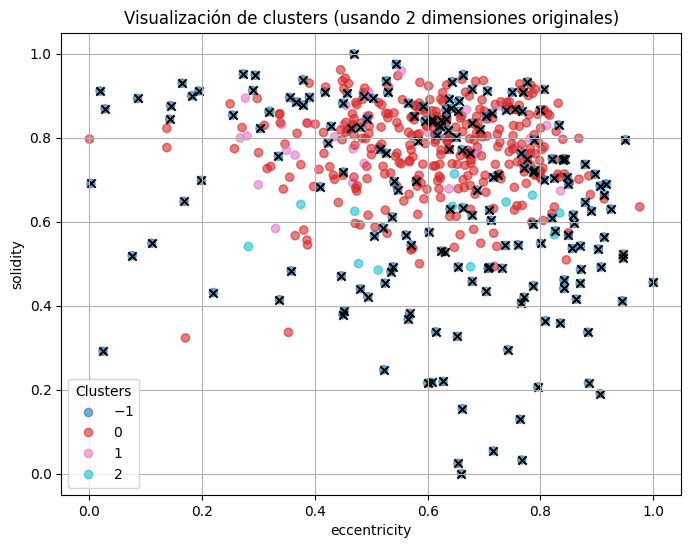

In [15]:
labels_mm = clustering_mm.labels_

# Convertimos a array por si aún está en DataFrame
X_mm = df_combined_stc_mm.values

# Graficamos usando las dos primeras características (columnas 0 y 1)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_mm[:, 0], X_mm[:, 1], c=labels_mm, cmap='tab10', alpha=0.6)

# Destacar los puntos de ruido (-1)
if -1 in labels_mm:
    plt.scatter(X_mm[labels_mm == -1, 0], X_mm[labels_mm == -1, 1],
                c='black', marker='x', label='Ruido')  # ← Corrección aquí

plt.title("Visualización de clusters (usando 2 dimensiones originales)")
plt.xlabel(df_combined_stc_mm_cl.columns[0])
plt.ylabel(df_combined_stc_mm_cl.columns[1])
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()


c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


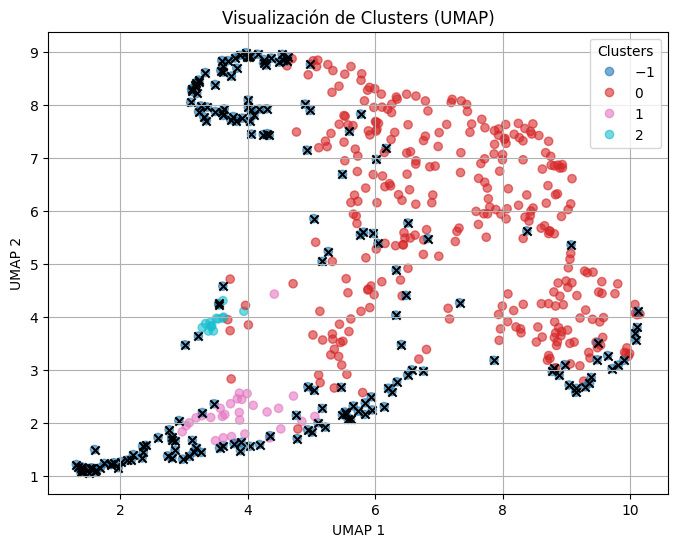

In [16]:
reducer_mm = umap.UMAP(n_neighbors=25, n_components=2, random_state=42)
X_umap_mm = reducer_mm.fit_transform(df_combined_stc_mm_cl)

labels_mm = clustering_mm.labels_  


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], c=labels_mm, cmap='tab10', alpha=0.6)

# Si hay ruido (etiqueta -1), lo destacamos
if -1 in labels_mm:
    plt.scatter(X_umap_mm[labels_mm == -1, 0], X_umap_mm[labels_mm == -1, 1],
                c='black', marker='x', label='Ruido')

plt.title("Visualización de Clusters (UMAP)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()


reducir l dimensionalidd

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_7504\523915449.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_zscore[:, 0], X_umap_zscore[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


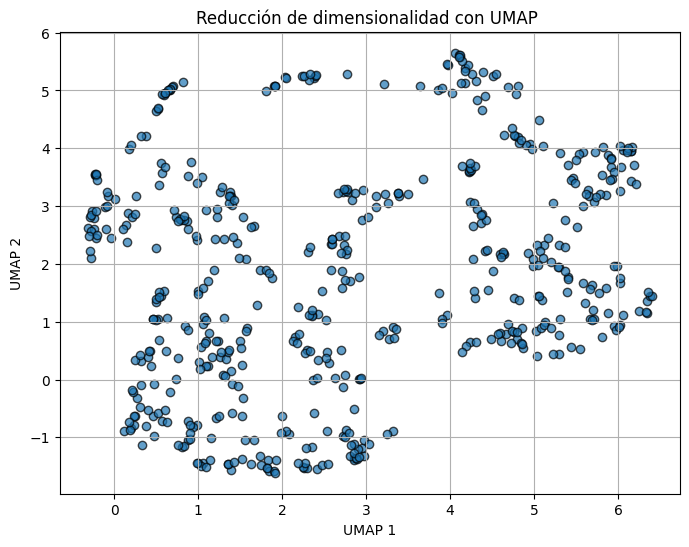

In [17]:
# Aplicar UMAP con diferentes valores de n_neighbors
umap_model_zscore = umap.UMAP(n_neighbors= 11, n_components=2,min_dist=0.01 ,random_state=42)  
X_umap_zscore = umap_model_zscore.fit_transform(X_combined_stc_z)


# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_zscore[:, 0], X_umap_zscore[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [50]:
clustering_umap_z = DBSCAN(eps=0.71, min_samples=17).fit(X_umap_zscore) #0.6 #12 #0.55 #9
clustering_umap_z.labels_

array([ 0,  2,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  1,
        0,  0,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,
        1,  1,  1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  1,  1,  0,  1,  0,  0,  1,  1,  1,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  0,  0, -1, -1, -1,
        2, -1,  0,  0,  1,  0,  1,  1,  1,  1,  2,  2,  2,  0,  1,  2,  1,
        1,  1,  2,  2,  0,  2,  0,  0,  1,  0,  0,  1,  0,  0,  1,  0,  0,
        0,  0,  0,  1,  1

In [51]:
labels = clustering_umap_z.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 3
Número de puntos de ruido: 14


In [52]:
y_true = df_combined_stc_z['label'] 
y_pred = clustering_umap_z.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN  -1    0    1   2
Etiqueta Real                   
higher           3    6  255   4
smaller         11  188   57  13


Con tres clusteres el 95.14% de las imágenes higher estarían en el cluster 1, y 69.88% de las imágenes small en el cluster 0.
Con dos clusteres todas las imágenes se van para un cluster

In [53]:
mask = labels != -1  # Excluir puntos de ruido

if len(set(labels[mask])) > 1:
    silhouette = silhouette_score(X_umap_zscore[mask], labels[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters (sin contar ruido) para calcular la silueta.")

Silhouette Score (sin ruido): 0.332


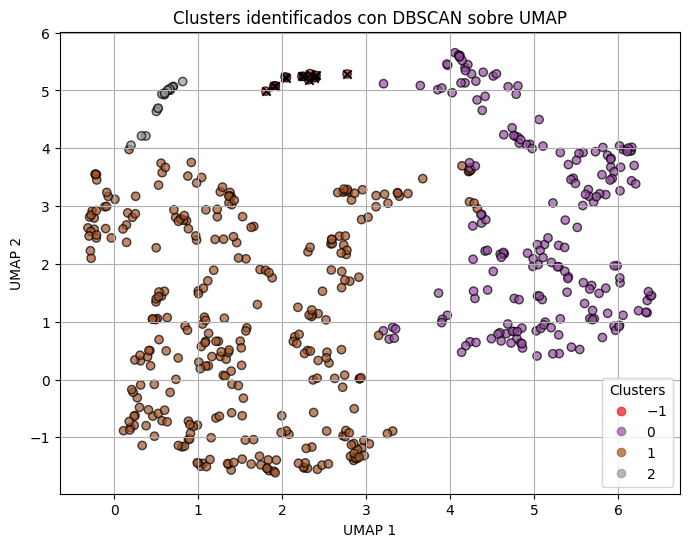

In [54]:
# Visualización de clustering DBSCAN aplicado sobre UMAP
plt.figure(figsize=(8, 6))

# Usamos los labels de DBSCAN como colores
scatter = plt.scatter(
    X_umap_zscore[:, 0], X_umap_zscore[:, 1],
    c=labels, cmap='Set1', edgecolor='k', alpha=0.7
)

# Opcional: destacar los puntos de ruido
if -1 in labels:
    plt.scatter(
        X_umap_zscore[labels == -1, 0], X_umap_zscore[labels == -1, 1],
        c='black', marker='x', label='Ruido'
    )

plt.title('Clusters identificados con DBSCAN sobre UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


min-max umap + dbscan

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_7504\3006463903.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


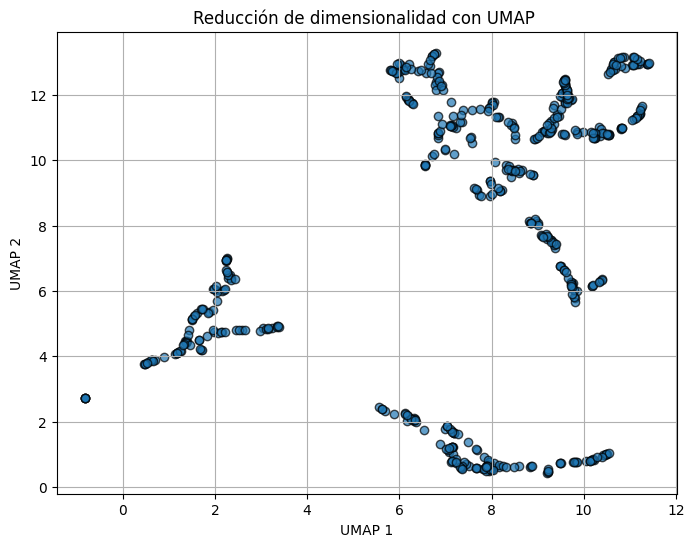

In [73]:
# Aplicar UMAP con diferentes valores de n_neighbors
umap_model_mm = umap.UMAP(n_neighbors= 4, n_components=5,min_dist=0.01, random_state=42)  #6 #5
X_umap_mm = umap_model_mm.fit_transform(X_combined_stc_mm)


# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()



In [82]:
clustering_umap_mm = DBSCAN(eps=3, min_samples=10).fit(X_umap_mm) #3.5
clustering_umap_mm.labels_

array([ 0,  1,  0,  0,  0,  1,  1,  1,  0,  1,  1,  1,  1,  0,  0,  1,  1,
        1,  0,  0,  1,  2,  0,  1,  0,  0,  0,  2,  0,  0,  0,  0,  0,  2,
        1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  1,  1,  0,  1,  1,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  0,  0,  0,
        0,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  2,  0,  0,  1,  0,  1,  0,  1,  1,  1,  1,  2,
        0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  2,  0,  0,  1,  0,
        0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        0,  2,  0,  1,  2,  2,  0,  0,  2,  0,  2,  2,  2,  2,  1,  0,  2,
        0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  2,  0,  0,  0,  0,  1,  1,  1,  0,  0,  1,  0,
        0,  0,  1,  1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,
        0,  1,  1,  1,  0

In [83]:
labels = clustering_umap_mm.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 3
Número de puntos de ruido: 5


In [84]:
y_true = df_combined_stc_mm['label'] 
y_pred = clustering_umap_mm.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN  -1    0   1   2
Etiqueta Real                  
higher           5  157  38  68
smaller          0  168  79  22


In [85]:
mask = labels != -1  # Excluir puntos de ruido

if len(set(labels[mask])) > 1:
    silhouette = silhouette_score(X_umap_mm[mask], labels[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters (sin contar ruido) para calcular la silueta.")

Silhouette Score (sin ruido): 0.605


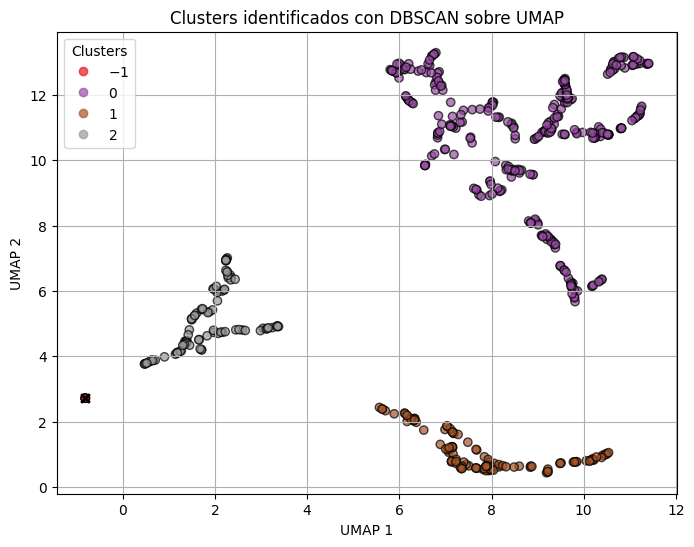

In [86]:
# Visualización de clustering DBSCAN aplicado sobre UMAP
plt.figure(figsize=(8, 6))

# Usamos los labels de DBSCAN como colores
scatter = plt.scatter(
    X_umap_mm[:, 0], X_umap_mm[:, 1],
    c=labels, cmap='Set1', edgecolor='k', alpha=0.7
)

# Opcional: destacar los puntos de ruido
if -1 in labels:
    plt.scatter(
        X_umap_mm[labels == -1, 0], X_umap_mm[labels == -1, 1],
        c='black', marker='x', label='Ruido'
    )

plt.title('Clusters identificados con DBSCAN sobre UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

los tres grupos que se forman estan formando por mezcla de higher y smaller en ambos de forma más o menos equilibrada.